In [15]:
#The task of GISETTE is to discriminate between to confusable handwritten digits 4 & 9.
# This is a two-class classification problem with sparse continuous inputvariables.
# gisette_train.data is used for the analysis here

import pandas as pd
import numpy as np

df = pd.read_csv('gisette_train.data', header=None)
df.head(10)

,0
0,550 0 495 0 0 0 0 976 0 0 0 0 983 0 995 0 983 ...
1,0 0 0 0 0 0 0 976 0 0 0 0 0 0 584 0 0 0 0 0 0 ...
2,0 0 0 0 0 0 0 0 0 0 0 0 983 0 995 983 976 0 0 ...
3,0 0 742 0 0 0 0 684 0 956 0 0 983 0 991 816 98...
4,0 0 0 0 0 0 0 608 0 979 0 0 0 0 972 0 0 0 0 0 ...
5,0 0 0 0 0 0 0 0 0 0 0 0 0 0 670 892 0 0 0 0 0 ...
6,0 0 0 0 0 0 0 0 0 0 0 0 0 0 995 976 0 0 0 0 0 ...
7,0 0 991 0 0 0 0 0 0 0 0 0 991 868 995 0 0 0 0 ...
8,0 0 983 0 0 652 0 0 0 0 0 0 968 0 592 0 0 0 0 ...
9,0 0 0 0 0 0 0 770 0 983 0 0 0 0 991 761 551 0 ...


In [14]:
df.shape

(6000, 1)

The data is given a 6000 rows and 1 column. The column can be separated by using delimiting character as space.

In [16]:
df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,983,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,541,0,0,945,0,0,0
7,0,0,991,0,0,0,0,0,0,0,...,995,0,0,0,0,0,631,0,0,483
8,0,0,983,0,0,652,0,0,0,0,...,568,0,0,0,0,983,991,0,0,0
9,0,0,0,0,0,0,0,770,0,983,...,0,0,0,684,705,0,0,0,0,656


We can see that most of the values are zero as it is a sparse dataset. According to the document given, only about 13% of the values are non-zero.

In [17]:
df.shape

(6000, 5000)

In [52]:
df_gisette_labels = pd.read_csv('gisette_train.labels', header=None)
df_gisette_labels = label_df.iloc[:,0]
df_gisette_labels

0       1
1      -1
2       1
3       1
4       1
       ..
5995   -1
5996    1
5997   -1
5998   -1
5999   -1
Name: 0, Length: 6000, dtype: int64

In [57]:
label_df.iloc[:,0].unique()

array([ 1, -1])

Here the target values are 1 and -1

In [19]:
from sklearn.preprocessing import StandardScaler
#Normalize the data so that the data has a normal distribution -- mean = 0; stdev = 1
x = StandardScaler().fit_transform(df.values)
np.mean(x),np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [30]:
# Choosing the first 10 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components=2)
principalComponents_gisette = pca_gisette.fit_transform(x)
principal_gisette_df = pd.DataFrame(data = principalComponents_gisette, columns = ['PC1', 'PC2']);
pca_gisette.explained_variance_ratio_ 

array([0.02883488, 0.02258951])

Considering only first two Principal components

<Figure size 432x288 with 0 Axes>

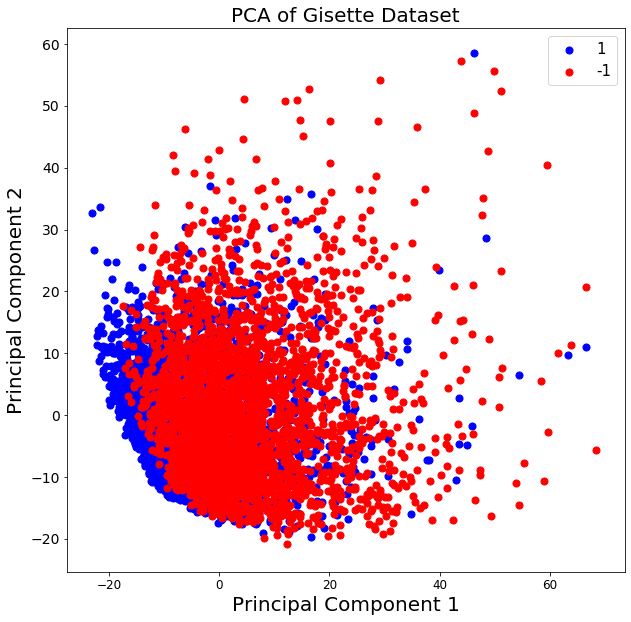

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("PCA of Gisette Dataset",fontsize=20)
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_gisette_labels == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep, 'PC1']
               , principal_gisette_df.loc[indicesToKeep, 'PC2'], c = color, s =50)

plt.legend(targets,prop={'size': 15})

From the scatterplot, we could see that both the principal components are overlapped mostly. It means that the hand writings of number 4 and 9(targets 1 and -1) are confusing as indicated in the document.

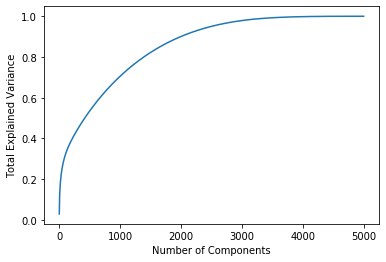

In [43]:
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
#Variance graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

In [44]:
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

First two components explain more variance.